In [603]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [604]:
import numpy as np
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

#pd.set_option('display.max_rows', 500)

In [605]:
def createDataFrame(stock, start, end):
    df = stock.history(start=start, end=end)

    df["Change"] = df["Close"].pct_change() # 전날 대비 변화율
    # df.index = pd.to_datetime(df.index).strftime("%Y-%m-%d") # 날짜 형식 간단하게 만들기
	
    # 지표 데이터
    # df2 = pd.read_csv("/Users/ryujonghyeok/Jonghyeok/Sejong/SAI/자료모음집.csv") 
    # df = pd.merge(df, df2, on="Date") """

    # df.set_index("Date", inplace=True)

    return df

In [606]:
# Define the stock
stock = yf.Ticker("SOXX")

# Create a dataframe from 'start' to 'end'
start="2023-04-01"
end="2024-04-30"

df = createDataFrame(stock, start, end)
df = df[["Close", "Change"]]
df

,Close,Change
Date,,
2023-04-03 00:00:00-04:00,143.788406,NaN
2023-04-04 00:00:00-04:00,141.107254,-0.018647
2023-04-05 00:00:00-04:00,138.660934,-0.017337
2023-04-06 00:00:00-04:00,137.946579,-0.005152
2023-04-10 00:00:00-04:00,140.383133,0.017663
...,...,...
2024-04-23 00:00:00-04:00,205.869995,0.020877
2024-04-24 00:00:00-04:00,208.539993,0.012969
2024-04-25 00:00:00-04:00,212.410004,0.018558


In [607]:
# FEDFUNDS: Federal Funds Effective Rate
# DFEDTARU: Federal Funds Target Range - Upper Limit
# CPIAUCSL: Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
# DGS10: Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis


# access CPI.csv file in 'data' folder
cpiaucsl = pd.read_csv('data/CPIAUCSL.csv')
dfedtaru = pd.read_csv('data/DFEDTARU.csv')
dgs10 = pd.read_csv('data/DGS10.csv')
fedfunds = pd.read_csv('data/FEDFUNDS.csv')
unrate = pd.read_csv('data/UNRATE.csv')


# convert 'DATE' column to datetime
cpiaucsl['DATE'] = pd.to_datetime(cpiaucsl['DATE'])
dfedtaru['DATE'] = pd.to_datetime(dfedtaru['DATE'])
dgs10['DATE'] = pd.to_datetime(dgs10['DATE'])
fedfunds['DATE'] = pd.to_datetime(fedfunds['DATE'])
unrate['DATE'] = pd.to_datetime(unrate['DATE'])

# set start and end date with dataframe data type
start = pd.to_datetime(start)
end = pd.to_datetime(end)

# combine fed, cpi, treasury using merge from start to end
data = pd.merge(fedfunds, cpiaucsl, on='DATE', how='outer')
data = pd.merge(data, dfedtaru, on='DATE', how='outer')
data = pd.merge(data, dgs10, on='DATE', how='outer')
data = pd.merge(data, unrate, on='DATE', how='outer')
data = data[(data['DATE'] >= start) & (data['DATE'] <= end)]
data = data.replace(".", np.NaN)
data = data.ffill()

data.index = data['DATE']
data = data.drop(columns=['DATE'])

data

,FEDFUNDS,CPIAUCSL,DFEDTARU,DGS10,UNRATE
DATE,,,,,
2023-04-01,4.83,303.032,5.0,NaN,3.4
2023-04-02,4.83,303.032,5.0,NaN,3.4
2023-04-03,4.83,303.032,5.0,3.43,3.4
2023-04-04,4.83,303.032,5.0,3.35,3.4
2023-04-05,4.83,303.032,5.0,3.30,3.4
...,...,...,...,...,...
2024-04-26,5.33,312.230,5.5,4.67,3.9
2024-04-27,5.33,312.230,5.5,4.67,3.9
2024-04-28,5.33,312.230,5.5,4.67,3.9


In [608]:
# Convert 'df' to tz-aware dataframe
df = df.tz_localize(None)

# Combine 'df' and 'data' dataframe respect to 'DATE' as index
df = pd.merge(df, data, left_index=True, right_index=True, how='inner')

df

,Close,Change,FEDFUNDS,CPIAUCSL,DFEDTARU,DGS10,UNRATE
2023-04-03,143.788406,NaN,4.83,303.032,5.0,3.43,3.4
2023-04-04,141.107254,-0.018647,4.83,303.032,5.0,3.35,3.4
2023-04-05,138.660934,-0.017337,4.83,303.032,5.0,3.30,3.4
2023-04-06,137.946579,-0.005152,4.83,303.032,5.0,3.30,3.4
2023-04-10,140.383133,0.017663,4.83,303.032,5.0,3.41,3.4
...,...,...,...,...,...,...,...
2024-04-23,205.869995,0.020877,5.33,312.230,5.5,4.61,3.9
2024-04-24,208.539993,0.012969,5.33,312.230,5.5,4.65,3.9
2024-04-25,212.410004,0.018558,5.33,312.230,5.5,4.7,3.9
2024-04-26,216.899994,0.021138,5.33,312.230,5.5,4.67,3.9


[ 10.09354129  38.78570183 -23.90172861 -39.16356005  -9.55171538]
-2799.8503234500845
0.86866797710803


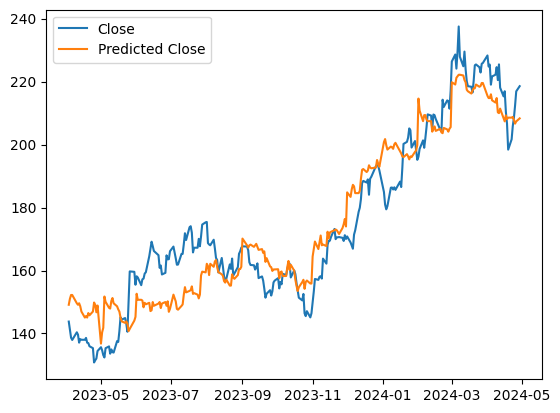

In [609]:
# import the scikit learn linear regression model
from sklearn.linear_model import LinearRegression

# create a linear regression model between 'Close' and 'CPIAUCSL', 'DFEDTARU', 'DGS10', 'FEDFUNDS', 'UNRATE
model = LinearRegression()

x = df[['CPIAUCSL', 'DFEDTARU', 'DGS10', 'FEDFUNDS', 'UNRATE']]
model.fit(x, df['Close'])

# print the model coefficients
print(model.coef_)
print(model.intercept_)
print(model.score(x, df['Close']))

# add predicted 'Close' values to the dataframe
df['Predicted Close'] = model.predict(x)

# plot the 'Close' and 'Predicted Close' values
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, model.predict(x), label='Predicted Close')
plt.legend()
plt.show()

In [610]:
df

,Close,Change,FEDFUNDS,CPIAUCSL,DFEDTARU,DGS10,UNRATE,Predicted Close
2023-04-03,143.788406,NaN,4.83,303.032,5.0,3.43,3.4,149.125433
2023-04-04,141.107254,-0.018647,4.83,303.032,5.0,3.35,3.4,151.037571
2023-04-05,138.660934,-0.017337,4.83,303.032,5.0,3.30,3.4,152.232657
2023-04-06,137.946579,-0.005152,4.83,303.032,5.0,3.30,3.4,152.232657
2023-04-10,140.383133,0.017663,4.83,303.032,5.0,3.41,3.4,149.603467
...,...,...,...,...,...,...,...,...
2024-04-23,205.869995,0.020877,5.33,312.230,5.5,4.61,3.9,208.796999
2024-04-24,208.539993,0.012969,5.33,312.230,5.5,4.65,3.9,207.840930
2024-04-25,212.410004,0.018558,5.33,312.230,5.5,4.7,3.9,206.645843
2024-04-26,216.899994,0.021138,5.33,312.230,5.5,4.67,3.9,207.362895


In [611]:
def buy(현금보유량, 주식보유량, 현재주가):
    if 주식보유량 == 0:
        주식보유량 = 현금보유량 // 현재주가
        현금보유량 -= 주식보유량 * 현재주가
        # print(f"Bought at {현재주가} with {주식보유량} stocks")
    return 현금보유량, 주식보유량


def sell(현금보유량, 주식보유량, 현재주가):
    if 주식보유량 > 0:
        현금보유량 += 주식보유량 * 현재주가
        주식보유량 = 0
        # print(f"Sold at {현재주가} with {주식보유량} stocks")
    return 현금보유량, 주식보유량

def total_asset(현금보유량, 주식보유량, 현재주가):
    return 현금보유량 + 주식보유량 * 현재주가

In [612]:
def score_calculate(i):
    # 4.76130047  -2.86062042 -31.53250228  -8.93819761  -6.0887131
    # x = df[['CPIAUCSL', 'DFEDTARU', 'DGS10', 'FEDFUNDS', 'UNRATE']]

    d_cpiaucsl = float(df.iloc[i]["CPIAUCSL"])
    d_dfedtaru = float(df.iloc[i]["DFEDTARU"])
    d_dgs10 = float(df.iloc[i]["DGS10"])
    d_fedfunds = float(df.iloc[i]["FEDFUNDS"])
    d_unrate = float(df.iloc[i]["UNRATE"])

    score = 4.76130047 * d_cpiaucsl - 2.86062042 * d_dfedtaru - 31.53250228 * d_dgs10 - 8.93819761 * d_fedfunds - 6.0887131 * d_unrate -838.334901756302

    return score

score_plt = []
# 복합적인 요소를 분석하여 일정 조건에 따라 매수 및 매도 반복
def strategy_score(df):
    global score_plt

    현금보유량 = 1000000
    주식보유량 = 0

    현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, df.iloc[0].Close)
    for i in range(len(df)):
        
        # 점수 계산하기
        score = score_calculate(i)

        현재주가 = df.iloc[i].Close

        print(score, 현재주가)
        
        # 점수가 일정 기준보다 클 때 매수하기
        if i-1 >= 0:
            if score > df.iloc[i-1].Close * 1.01:
                현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, 현재주가)

            # 점수가 일정 기준보다 작을 때 매도하기
            elif score < df.iloc[i-1].Close * 0.99:
                현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, 현재주가)

        score_plt.append(total_asset(현금보유량, 주식보유량, 현재주가))

    현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, df.iloc[-1].Close)


    print(f"Score 계산 - 현금보유량: {현금보유량:.2f} profit: {(현금보유량-1000000)/1000000*100:.2f}%")


In [613]:
buyAndHold_plt = []
# 시작시점에 매수 후 종료시점에 매도
def strategy_buyAndHold(df):
    global buyAndHold_plt

    현금보유량 = 1000000
    주식보유량 = 0

    현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, df.iloc[0].Close)
    
    buyAndHold_plt = []
    for i in range(1, len(df)-1):
        buyAndHold_plt.append(total_asset(현금보유량, 주식보유량, df.iloc[i].Close))
    
    현금보유량 += 주식보유량 * df.iloc[-1].Close

    print(f"Hold - 현금보유량: {현금보유량:.2f}, profit: {(현금보유량-1000000)/1000000*100:.2f}%")


In [614]:
difference_plt = []
# 최고점 대비 일정 비율 하락하면 매도, 최저점 대비 일정 비율 상승하면 매수
def strategy_difference(df):
    global difference_plt
    현금보유량 = 1000000
    주식보유량 = 0
    dif1 = 0.36 # 일정 비율 하락하는 정도 🤑
    dif2 = 0.02 # 일정 비율 상승하는 정도 🤑

    minimum = float('inf')
    maximum = float('-inf')

    for i in range(2, len(df)):
        price = df.iloc[i].Close
        if price > maximum:
            maximum = price
        elif price < minimum:
            minimum = price
        if 주식보유량 > 0 and price < maximum * (1-dif1):
        #print(f"Sold at {price(hist, i)}")
            현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, price)
            maximum = float('-inf')
        elif 주식보유량 == 0 and price > minimum * (1+dif2):
            #print(f"Bought at {price(hist, i)}")
            현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, price)
            minimum = float('inf')

        difference_plt.append(total_asset(현금보유량, 주식보유량, price))

    현금보유량 += 주식보유량 * df.iloc[-1].Close
    주식보유량 = 0

    print(f"Difference - 현금보유량: {현금보유량:.2f}, profit: {(현금보유량-1000000)/1000000*100:.2f}%")

In [615]:
""" import requests
import datetime
import pandas as pd
from bs4 import BeautifulSoup

requests.packages.urllib3.disable_warnings()

def scraper(url):
    resp = requests.get(url, verify=False)
    page = resp.text
    soup = BeautifulSoup(page, "html.parser")

    body_copy = str(soup.find_all("p", {"class": "body-copy"}))
    body_copy = body_copy.replace('<p class="body-copy">', '')
    body_copy = body_copy.replace('</p>', '')

    return body_copy


for i in range(1, len(df)):
    a = df.iloc[i].name
    a = a.strftime("%b-%d-%Y")
    a = str(a).lower()
    url = f"https://www.investrade.com/market-review-{a}/"
    content = scraper(url)
    df.loc[df.index[i], "Title"] = content

df.tail()

 """

' import requests\nimport datetime\nimport pandas as pd\nfrom bs4 import BeautifulSoup\n\nrequests.packages.urllib3.disable_warnings()\n\ndef scraper(url):\n    resp = requests.get(url, verify=False)\n    page = resp.text\n    soup = BeautifulSoup(page, "html.parser")\n\n    body_copy = str(soup.find_all("p", {"class": "body-copy"}))\n    body_copy = body_copy.replace(\'<p class="body-copy">\', \'\')\n    body_copy = body_copy.replace(\'</p>\', \'\')\n\n    return body_copy\n\n\nfor i in range(1, len(df)):\n    a = df.iloc[i].name\n    a = a.strftime("%b-%d-%Y")\n    a = str(a).lower()\n    url = f"https://www.investrade.com/market-review-{a}/"\n    content = scraper(url)\n    df.loc[df.index[i], "Title"] = content\n\ndf.tail()\n\n '

Hold - 현금보유량: 1519892.14, profit: 51.99%
Difference - 현금보유량: 1625681.46, profit: 62.57%
418.15879835203793 143.7884063720703
420.681398534438 141.1072540283203
422.25802364843787 138.6609344482422
422.25802364843787 137.9465789794922
418.789448397638 140.3831329345703
418.15879835203793 139.64599609375
418.789448397638 137.09202575683594
417.52814830643786 138.22056579589844
415.3208731468379 138.0053253173828
412.79827296443807 138.0053253173828
413.4289230100379 138.60220336914062
412.79827296443807 137.0854949951172
414.69022310123785 136.95828247070312
413.7442480328381 135.9536590576172
415.3208731468379 135.34371948242188
419.10477342043794 130.7967987060547
418.15879835203793 131.49484252929688
415.005548124038 132.04933166503906
417.843473329238 134.430419921875
410.81671166344825 135.6470489501953
415.54658700544826 134.6782989501953
417.43853714224826 133.13223266601562
417.03870706004807 132.38528442382812
414.83143190044814 135.33067321777344
412.30883171804805 135.90147399

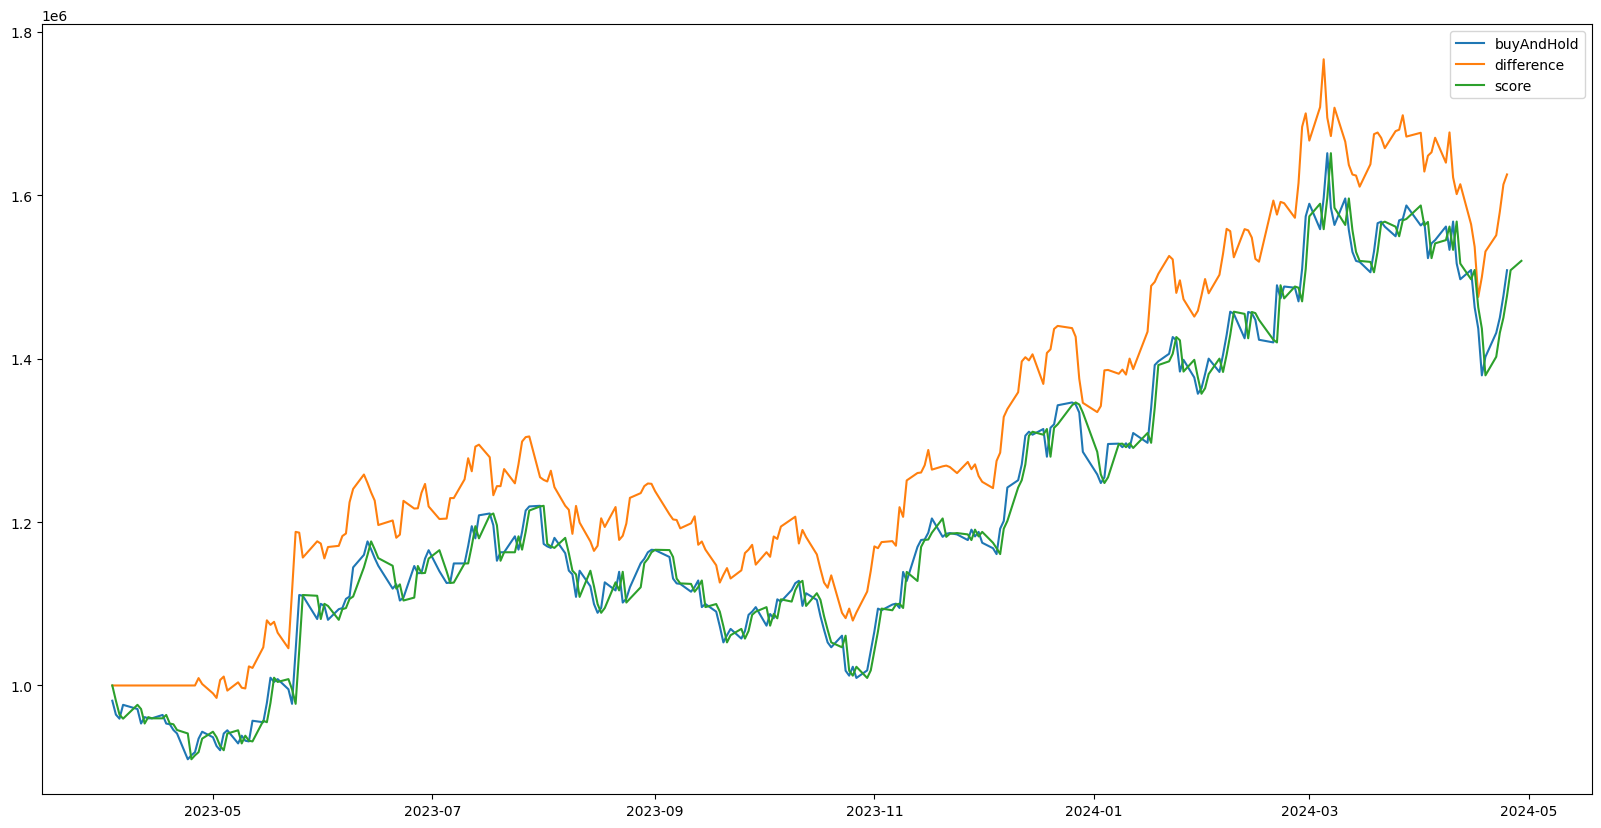

In [616]:
strategy_buyAndHold(df)
strategy_difference(df)
strategy_score(df)

# 그래프 그리기
plt.figure(figsize=(20, 10))
plt.plot(df.index[:-2], buyAndHold_plt, label="buyAndHold")
plt.plot(df.index[:-2], difference_plt, label="difference")
plt.plot(df.index, score_plt, label="score")
plt.legend()
plt.show()